In [1]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing

from sklearn.model_selection import train_test_split

#model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read data

df = pd.read_csv("F:\DataScience Python\Machine Learning\Models\KNN\Market Positioning of Mobile\Dataset\Mobile_data.csv")
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [3]:
# Exploring the data

df.shape

(2000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [5]:
# checking for missing values:

df.isnull().sum() #-> No missing values

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

<AxesSubplot:>

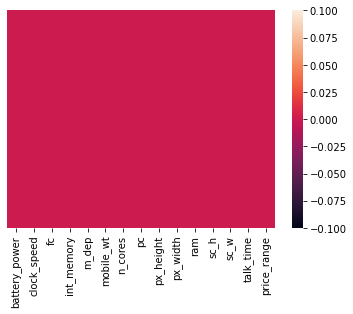

In [6]:
# Visualizing missing values

sns.heatmap(df.isna(), yticklabels = False)

In [7]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [8]:
# check for skewness

df.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

In [9]:
# Define X and y

x = df.drop('price_range', axis = 1)
y = df.price_range

In [10]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 1)

In [12]:
# Fitting model

Near = KNeighborsClassifier(n_neighbors = 5 ,metric='euclidean' )
Near.fit(X_train, y_train)
Near.score(X_train, y_train)

0.9557142857142857

In [13]:
predicted_labels = Near.predict(X_test)
Near.score(X_test, y_test)

0.92

In [14]:
# MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_min = scaler.fit_transform(X_train)

X_test_min = scaler.fit_transform(X_test)

In [15]:
Near = KNeighborsClassifier(n_neighbors = 15)
Near.fit(X_train_min, y_train)
Near.score(X_train_min, y_train)

0.7328571428571429

In [16]:
predicted_labels = Near.predict(X_test)
Near.score(X_test_min, y_test)

0.6333333333333333

In [17]:
# Standaed Scaler

from sklearn.preprocessing import StandardScaler

st_scale = StandardScaler()
X_train_st = st_scale.fit_transform(X_train)
X_test_st = st_scale.transform(X_test)

In [18]:
Near = KNeighborsClassifier(n_neighbors = 15)
Near.fit(X_train_st, y_train)
Near.score(X_train_st, y_train)

0.7307142857142858

In [19]:
predicted_labels = Near.predict(X_test)
Near.score(X_test_st, y_test)

0.6283333333333333

In [20]:
# Robust Scaler

from sklearn.preprocessing import RobustScaler

Ro_scale = RobustScaler()
X_train_Ro = Ro_scale.fit_transform(X_train)
X_test_Ro = Ro_scale.transform(X_test)

In [21]:
Near = KNeighborsClassifier(n_neighbors = 15)
Near.fit(X_train_Ro, y_train)
Near.score(X_train_Ro, y_train)

0.7321428571428571

In [22]:
predicted_labels = Near.predict(X_test)
Near.score(X_test_Ro, y_test)

0.6283333333333333